In [ ]:
# https://twitter.com/p_surridge/status/925046405617594368

# antiIntellectual
# I’d rather put my trust in the wisdom of ordinary people than the opinions of experts
# W7W8W9W10W11

# education

# Any breakdown of these people by party vote or media consumption.
# It says alot by itself, but a semi unreality to it an actual practice!

# media source variables?

# profile_newspaper_readership_201 W10W13


# euSources W7W8

# infoSources W4W5W6W7W8W12W13

# tvWatch/radioListen/paperRead/internetRead W4W5W8

# twitterUse/twitterInfo W4W5W12

# fbUse/fbInfo           W4W5W12



# resourceAccess




In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)

import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
from gaussian_kde import gaussian_kde
from utility import display_components,display_pca_data


import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [2]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster

In [9]:
BES_files = {"W13_only":"BES2017_W13_v1.0.dta",
             "W10_only":"BES2015_W10_v0.3.dta",
             "W9_only" :"BES2015_W9_v1.2.dta"}

wave = "W9_only"


Treatment = wave
if not os.path.exists(BES_data_folder+Treatment):
    os.makedirs(BES_data_folder+Treatment)
    
dataset = BES_files[wave]

BES_Panel = pd.read_stata(BES_data_folder+dataset)    

In [10]:
BES_Panel["edlevel"].value_counts()

Undergraduate        8409
GCSE A*-C            5666
A-level              5247
Postgrad             2739
No qualifications    2065
GCSE D-G             1301
Name: edlevel, dtype: int64

In [6]:
BES_Panel["edlevel"].value_counts().sum()

26501

In [7]:
BES_Panel.shape

(31197, 312)

In [8]:
BES_Panel["education"].value_counts()

University or CNAA first degree (eg BA, B.Sc, B.Ed)      6199
GCE A level or Higher Certificate                        4245
CSE grade 1, GCE O level, GCSE, School Certificate       4146
Other technical, professional or higher qualification    3793
University or CNAA higher degree (eg M.Sc, Ph.D)         2640
No formal qualifications                                 2078
City and Guild certificate                               1342
University diploma                                       1158
Teaching qualification (not degree)                       703
City and Guild certificate - advanced                     688
CSE grades 2-5                                            673
Scottish Higher Certificate                               596
Clerical and commercial                                   573
Prefer not to say                                         571
Nursing qualification (eg SEN, SRN, SCM, RGN)             466
Recognised trade apprenticeship completed                 422
Don't kn

In [12]:
import seaborn as sns

In [21]:
BES_Panel["antiIntellectual"].value_counts()[ BES_Panel["antiIntellectual"].cat.categories]

Strongly disagree             3413
Disagree                      6720
Neither agree nor disagree    8355
Agree                         7549
Strongly agree                2873
Don't know                    1126
Name: antiIntellectual, dtype: int64

In [17]:
BES_Panel["antiIntellectual"].cat.categories

Index(['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree',
       'Strongly agree', 'Don't know'],
      dtype='object')

Neither agree nor disagree    8355
Agree                         7549
Disagree                      6720
Strongly disagree             3413
Strongly agree                2873
Don't know                    1126
Name: antiIntellectual, dtype: int64

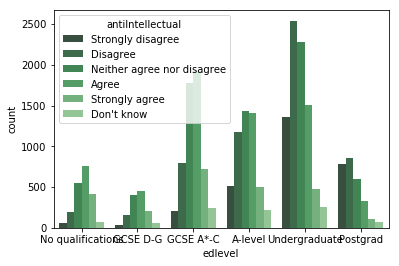

In [27]:
# I’d rather put my trust in the wisdom of ordinary people than the opinions of experts

sns.countplot(hue="antiIntellectual", x="edlevel", data=BES_Panel, palette="Greens_d");

In [29]:
pd.crosstab(BES_Panel["antiIntellectual"],BES_Panel["edlevel"])

edlevel,No qualifications,GCSE D-G,GCSE A*-C,A-level,Undergraduate,Postgrad
antiIntellectual,,,,,,
Strongly disagree,59,31,210,513,1356,788
Disagree,200,161,790,1172,2542,861
Neither agree nor disagree,556,397,1773,1428,2280,596
Agree,756,447,1929,1409,1503,324
Strongly agree,418,201,725,504,476,104
Don't know,76,64,239,221,252,66


In [31]:
N = 1000
mark = np.random.choice([True,False], N)
periods = np.random.choice(['BASELINE','WEEK 12', 'WEEK 24', 'WEEK 4'], N)

df = pd.DataFrame({'mark':mark,'period':periods})
ct = pd.crosstab(df.period, df.mark)

#  mark      False  True 
#  period                
#  BASELINE    118    111
#  WEEK 12     117    149
#  WEEK 24     117    130
#  WEEK 4      127    131

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

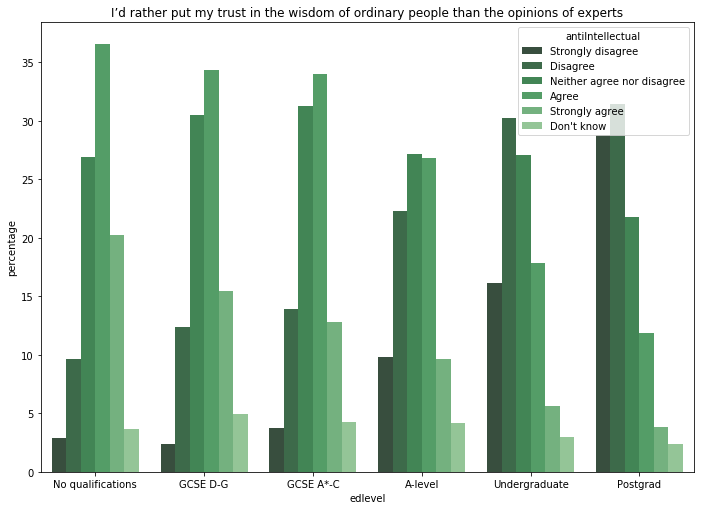

In [85]:
var1 = "edlevel"
var2 = "antiIntellectual"

ct = pd.crosstab(BES_Panel[var1],BES_Panel[var2],normalize='index')*100
pct = ct.stack().reset_index().rename(columns={0:'percentage'})

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.barplot(hue=var2, x=var1, y='percentage', data=pct, palette="Greens_d",ax=ax);
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")

fig.savefig( BES_data_folder+Treatment+"ed_by_anti_int_coarse.png", bbox_inches='tight' )


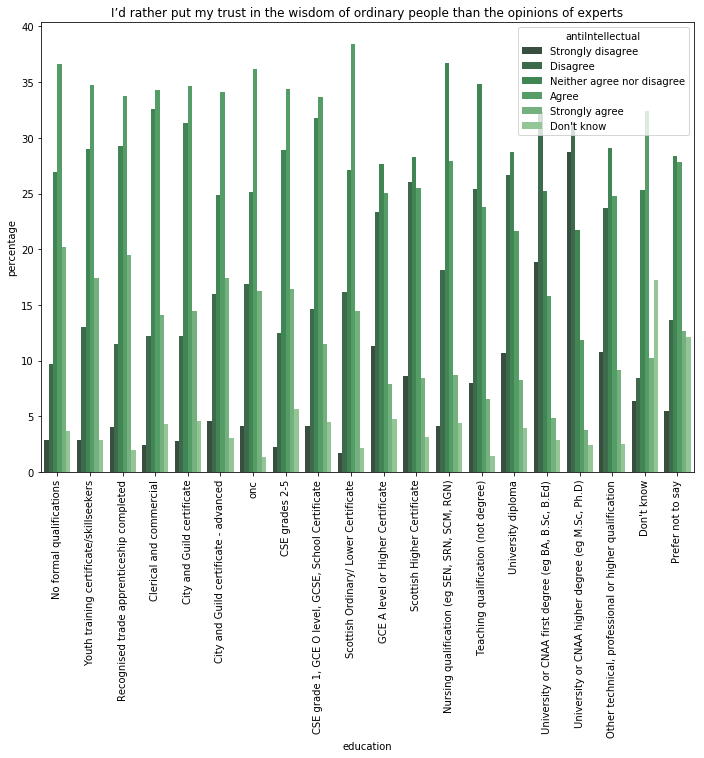

In [60]:
var1 = "education"
var2 = "antiIntellectual"


ct = pd.crosstab(BES_Panel[var1],BES_Panel[var2],normalize='index')*100
pct = ct.stack().reset_index().rename(columns={0:'percentage'})

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.barplot(hue=var2, x=var1, y='percentage', data=pct, palette="Greens_d",ax=ax);
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")
ax.set_xticklabels( BES_Panel[var1].cat.categories, rotation=90 ) ;


In [66]:
BES_Panel[var2].cat.remove_categories("Don't know")


not_dks = (BES_Panel[var2] != "Don't know")
BES_Panel[var2][not_dks].cat.codes.value_counts()

2    8355
3    7549
1    6720
0    3413
4    2873
dtype: int64

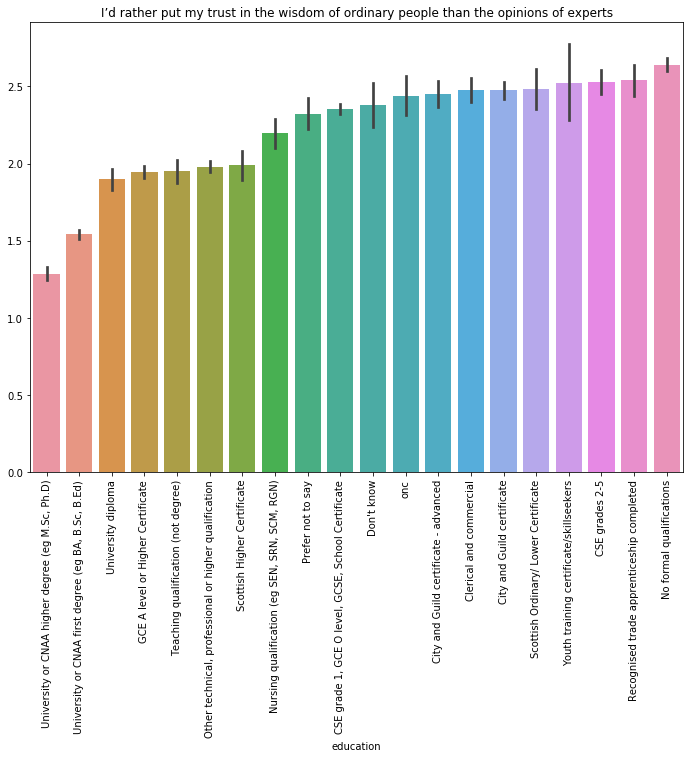

In [84]:
var1 = "education"
var2 = "antiIntellectual"

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)


# get list of x-axis values ordered by mean
sorted_index = BES_Panel[var2][not_dks].cat.codes.groupby(BES_Panel[var1][not_dks]).mean().sort_values(ascending=True).index

sns.barplot(x=BES_Panel[var1][not_dks], y=BES_Panel[var2][not_dks].cat.codes, order = sorted_index)
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")



ax.set_xticklabels( sorted_index, rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"ed_by_anti_int_fine.png", bbox_inches='tight' )

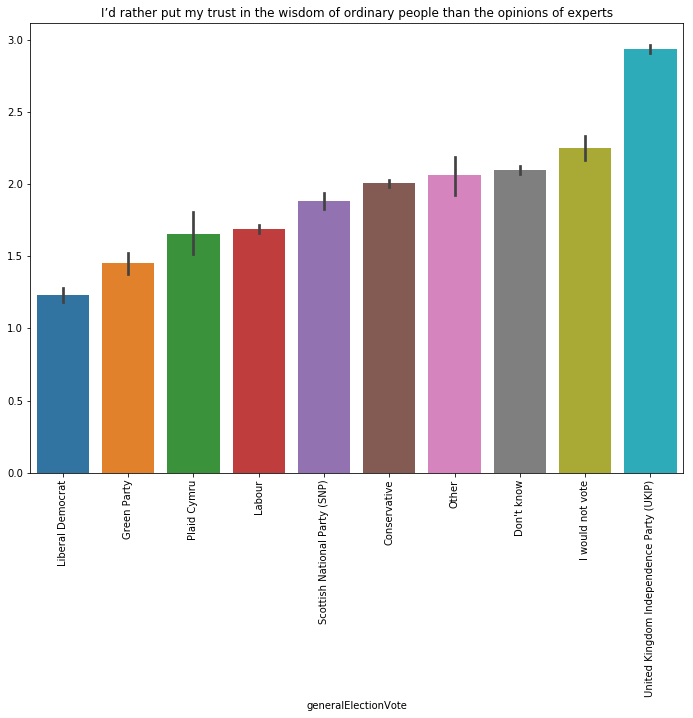

In [94]:
var1 = "generalElectionVote"
var2 = "antiIntellectual"

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)


# get list of x-axis values ordered by mean
sorted_index = BES_Panel[var2][not_dks].cat.codes.groupby(BES_Panel[var1][not_dks]).mean().sort_values(ascending=True).index

sns.barplot(x=BES_Panel[var1][not_dks], y=BES_Panel[var2][not_dks].cat.codes, order = sorted_index)
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")



ax.set_xticklabels( sorted_index, rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"vote_by_anti_int_coarse.png", bbox_inches='tight' )

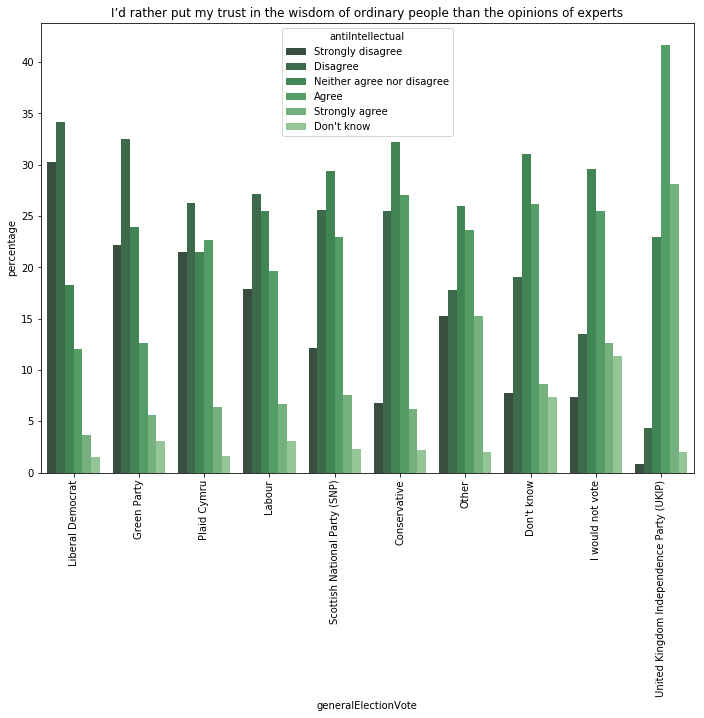

In [95]:
var1 = "generalElectionVote"
var2 = "antiIntellectual"

ct = pd.crosstab(BES_Panel[var1],BES_Panel[var2],normalize='index')*100
pct = ct.stack().reset_index().rename(columns={0:'percentage'})

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.barplot(hue=var2, x=var1, y='percentage', data=pct, palette="Greens_d",ax=ax, order=sorted_index);
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")
ax.set_xticklabels( sorted_index, rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"vote_by_anti_int_fine.png", bbox_inches='tight' )


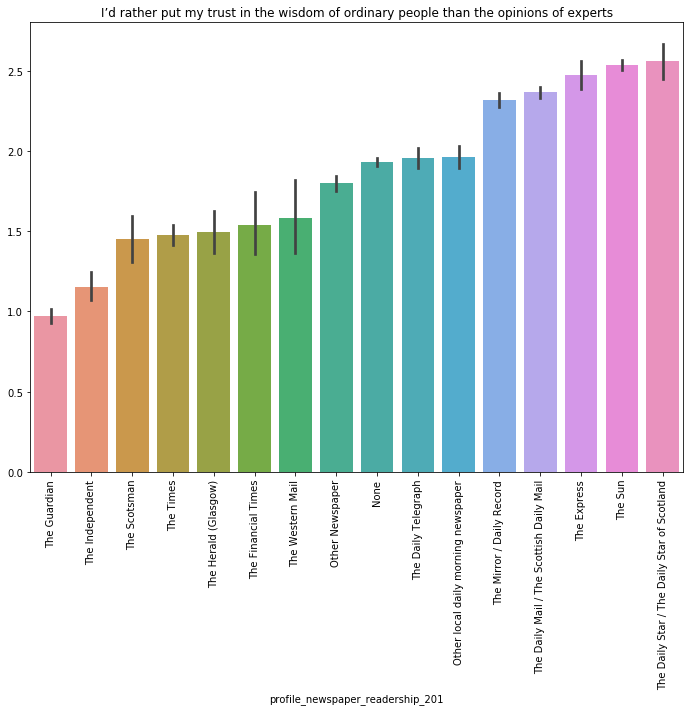

In [96]:
var1 = "profile_newspaper_readership_201"
var2 = "antiIntellectual"

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)


# get list of x-axis values ordered by mean
sorted_index = BES_Panel[var2][not_dks].cat.codes.groupby(BES_Panel[var1][not_dks]).mean().sort_values(ascending=True).index

sns.barplot(x=BES_Panel[var1][not_dks], y=BES_Panel[var2][not_dks].cat.codes, order = sorted_index)
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")



ax.set_xticklabels( sorted_index, rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"newspaper_by_anti_int_coarse.png", bbox_inches='tight' )

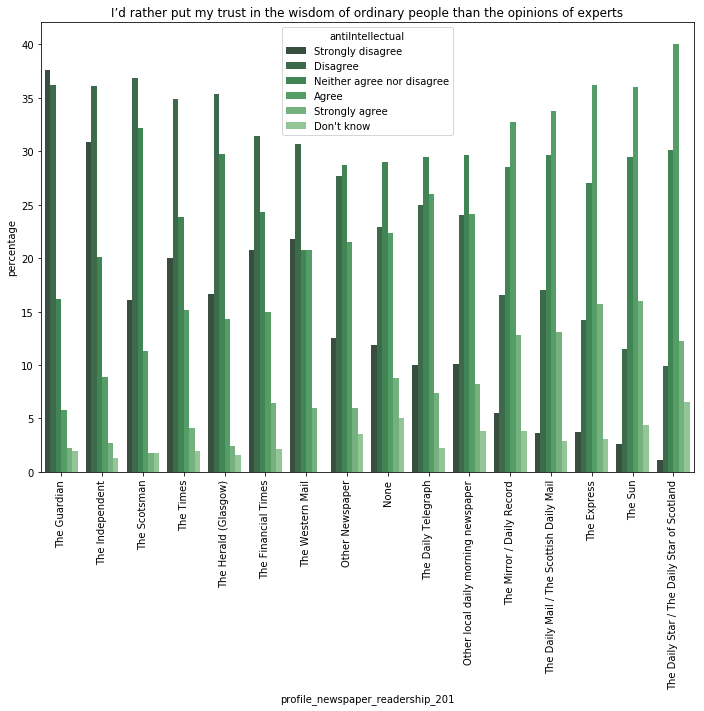

In [97]:
var1 = "profile_newspaper_readership_201"
var2 = "antiIntellectual"

ct = pd.crosstab(BES_Panel[var1],BES_Panel[var2],normalize='index')*100
pct = ct.stack().reset_index().rename(columns={0:'percentage'})

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.barplot(hue=var2, x=var1, y='percentage', data=pct, palette="Greens_d",ax=ax, order=sorted_index);
ax.set_title("I’d rather put my trust in the wisdom of ordinary people than the opinions of experts")
ax.set_xticklabels( sorted_index, rotation=90 ) ;

fig.savefig( BES_data_folder+Treatment+"newspaper_by_anti_int_fine.png", bbox_inches='tight' )
